In [ ]:
using System;
using System.Linq;

1.What is Linear Regression?

It is a linear approach of modeling the relationship of a dependant variable, also called an outcome, and one or more independant variables, also known as a feature. With one feature, naturally the regression chart will be linear. As you add more features, the regression chart can turn more quadratic. Quadratic regression is an extension of linear regression.

Important Terms - 

Outcome,
Feature,
Linear Regression,
Least Square Techinique,
Summination,
Supervised Learning


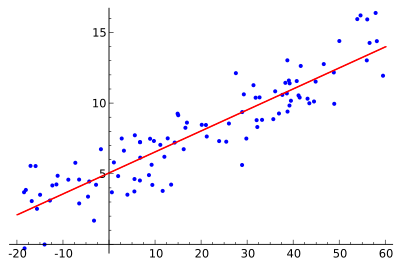

In [ ]:
let linearRegressionImage = File.ReadAllBytes("./LinearRegression.png");
let b64 = Convert.ToBase64String(linearRegressionImage);
HTML($"<img src=\"data:image/png;base64,{b64}\"></img>"); 


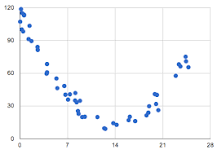

In [ ]:
let quadraticRegressionImage = File.ReadAllBytes("./quadraticRegression.png");
let b64 = Convert.ToBase64String(quadraticRegressionImage);
HTML($"<img src=\"data:image/png;base64,{b64}\"></img>"); 

2.PAT example of use

One example we could use is predict what the success rate(outcome) of a specific vendor template is based on how many payments there are monthly and if there is captcha encountered(feature).

3.What is the Linear Regression formula?


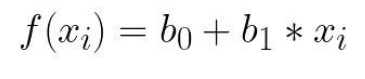

In [ ]:
let lrFormula = File.ReadAllBytes("./lrFormula.png");
let b64 = Convert.ToBase64String(lrFormula);
HTML($"<img src=\"data:image/png;base64,{b64}\"></img>"); 

f(xi) is the prediction(outcome) based on the function's parameters, b0 and b1(features) respectively. So we can deduce that the model we train needs to learn what b0 and b1 are. Given an array of x and y coordinates, i.e. [1,1] [2,2], [3,3], [4,4], [5,5], b0 and b1 are the regression coefficients that represent the y-intercept and slobe of the regression line. Since we need to be as close as possible to the real value of y, we need to determine how correct our estimations, f(xi), are. It can be calculated as follows -


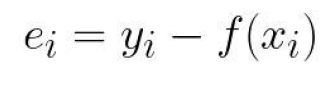

In [ ]:
let error = File.ReadAllBytes("./errorRegression.png");
let b64 = Convert.ToBase64String(error);
HTML($"<img src=\"data:image/png;base64,{b64}\"></img>"); 

Since we already know what the value is for y, we can subtract our prediction(outcome) from the actual value to get our error rating. You might wonder why we already know the value of the real y? This is because we are using 'Supervised Learning'. We have the data set we want to generate our linear regression model for.

Now, how do we minimize ei(error)? One way is to use the 'Least Squares Technique' and define the function that we want to minimize.


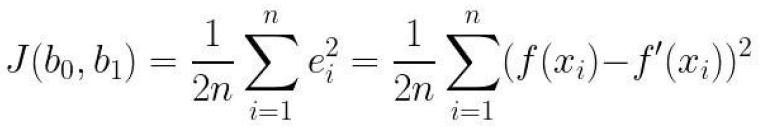

In [ ]:
let lst = File.ReadAllBytes("./lst.png");
let b64 = Convert.ToBase64String(lst);
HTML($"<img src=\"data:image/png;base64,{b64}\"></img>"); 

What we want to minimize is the objective function. To do so, we need to find the coefficients for b0 and b1 that will allow J to hit the global minimum. The following forumlas calculate the values for b1 and b0.


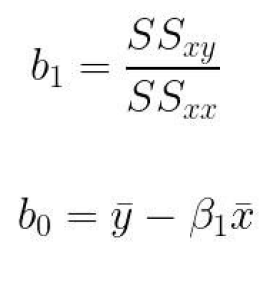

In [ ]:
let bo = File.ReadAllBytes("./b0.png");
let b64 = Convert.ToBase64String(bo);
HTML($"<img src=\"data:image/png;base64,{b64}\"></img>"); 

SSxy is just the sum of cross-deviation of y and x -


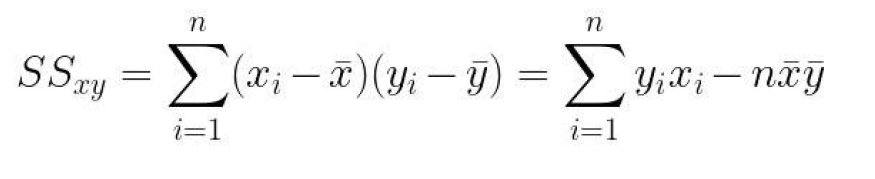

In [ ]:
let ssyx = File.ReadAllBytes("./ssyx.png");
let b64 = Convert.ToBase64String(ssyx);
HTML($"<img src=\"data:image/png;base64,{b64}\"></img>"); 

SSxx is just the sum of squared deviations of x -


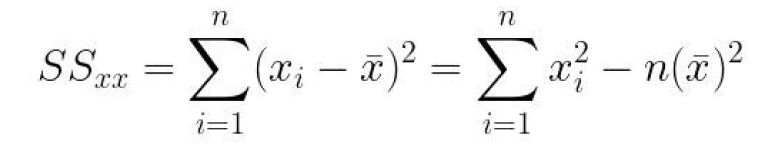

In [ ]:
let ssxx = File.ReadAllBytes("./ssxx.png");
let b64 = Convert.ToBase64String(ssxx);
HTML($"<img src=\"data:image/png;base64,{b64}\"></img>"); 

4. Code Example - To fit the same pattern of ML.Net we will use Fit() as our method name to "Fit" the data our formula. We will then use Predict() to get our outcome. In this example, x = feature and y = outcome.

In [ ]:
public class SingleLinearRegression
{
    public float _b0;
    public float _b1;

    public SingleLinearRegression()
    {
        _b0 = 0;
        _b1 = 0;
    }

    public void Fit(float[] x, float[] y)
    {
        //SSxy and SSxx formulas as above
        var ssxy = x.Zip(y, (a, b) => a * b).Sum() - (x.Length * x.Average() * y.Average());
        var ssxx = x.Zip(x, (a, b) => a * b).Sum() - (x.Length * x.Average() * x.Average());

        //b1 and b0 formulas as above
        _b1 = ssxy / ssxx;
        _b0 = y.Average() - _b1 * x.Average();
    }

    public float[] Predict(float[] z)
    {
        return z.Select(i => _b0 + i * _b1).ToArray();
    }
}

In [ ]:
using System;

float[] X = {1,2,3,4,5,6,7,8,9,10,11};
float[] Y = {2,9,11,17,16,20,35,37,48,57,66};

var singleLinearRegression = new SingleLinearRegression();
singleLinearRegression.Fit(X, Y);

var results = singleLinearRegression.Predict(X);
var counter = 0;

foreach(var result in results)
{
    Console.WriteLine("Prediction: " + result.ToString() + "\tActual: " + Y[counter].ToString());
    counter++;
}

Prediction: -2.090907	Actual: 2
Prediction: 4.1090927	Actual: 9
Prediction: 10.309092	Actual: 11
Prediction: 16.509092	Actual: 17
Prediction: 22.709093	Actual: 16
Prediction: 28.90909	Actual: 20
Prediction: 35.109093	Actual: 35
Prediction: 41.30909	Actual: 37
Prediction: 47.509094	Actual: 48
Prediction: 53.70909	Actual: 57
Prediction: 59.90909	Actual: 66


Naturally, as you have more and more GOOD and ACCURATE data, the macro accuracy of the model will rise.